# ECG

## google coolab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.1 MB/s eta 0:00:00


## data downloader

In [3]:
# # Step 1: Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Step 2: Clean up the environment

# !ls


# # Step 3: Download datasets
# !wget https://physionet.org/static/published-projects/qtdb/qt-database-1.0.0.zip
# !wget https://physionet.org/static/published-projects/nstdb/mit-bih-noise-stress-test-database-1.0.0.zip
# !ls
# print('Downloading data: Done')

# # Step 4: Create a directory for data
# !mkdir data

# # Step 5: Unzip the datasets
# !unzip qt-database-1.0.0.zip >> /dev/null
# !unzip mit-bih-noise-stress-test-database-1.0.0.zip >> /dev/null

# # Step 6: Move the extracted folders to the data directory
# !mv qt-database-1.0.0 data/
# !mv mit-bih-noise-stress-test-database-1.0.0 data/

# # Step 7: Remove the zip files
# !rm qt-database-1.0.0.zip
# !rm mit-bih-noise-stress-test-database-1.0.0.zip
# !ls
# !ls data
# print('Extracting data: Done')

# # Step 8: Move the data directory to Google Drive
# !mv data /content/drive/My\ Drive/
# print('Data saved to Google Drive.')

## imports

In [4]:
# Imports
import os
import glob
import numpy as np
from scipy.signal import resample_poly
import wfdb
import math
import _pickle as pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization,concatenate, Activation, Input, Conv2DTranspose, Lambda, LSTM, Reshape, Embedding

import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
# model with leakyrelu +self attenuation + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU
from tensorflow.keras.models import Model
#model with residual and deleteing strides for solving output dimention problem
from keras.layers import Conv1D, Conv1DTranspose, BatchNormalization, Input, Add
# first  **Reinforcement Learning Agent** method at the end it is developed
import keras
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from keras import losses
from datetime import datetime
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU

from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv1DTranspose
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Add, Multiply, UpSampling1D
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv2DTranspose
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose
from tensorflow.keras.models import Model
###############################################################################
#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import model_from_json
import glob
import wfdb
import numpy as np
import math
from scipy.signal import resample_poly
import pickle


## data

In [ ]:
# QTpath = '/content/drive/MyDrive/data/qt-database-1.0.0/'
# newFs = 360

# namesPath = glob.glob(QTpath + "/*.dat")
# QTDatabaseSignals = dict()

# # Process each file in the dataset
# for i in namesPath:
#     aux = i.split('.dat')
#     register_name = aux[0].split('/')[-1]
#     signal, fields = wfdb.rdsamp(aux[0])
#     qu = len(signal)

#     ann = wfdb.rdann(aux[0], 'pu1')
#     anntype = ann.symbol
#     annSamples = ann.sample

#     Anntype = np.array(anntype)
#     idx = Anntype == 'p'
#     Pidx = annSamples[idx]
#     idxS = Anntype == '('
#     Sidx = annSamples[idxS]
#     idxR = Anntype == 'N'
#     Ridx = annSamples[idxR]

#     ind = np.zeros(len(Pidx))

#     for j in range(len(Pidx)):
#         arr = np.where(Pidx[j] > Sidx)
#         arr = arr[0]
#         ind[j] = arr[-1]

#     ind = ind.astype(np.int64)
#     Pstart = Sidx[ind]
#     Pstart = Pstart - int(0.04 * fields['fs'])

#     auxSig = signal[0:qu, 0]

#     beats = list()
#     for k in range(len(Pstart) - 1):
#         remove = (Ridx > Pstart[k]) & (Ridx < Pstart[k + 1])
#         if np.sum(remove) < 2:
#             beats.append(auxSig[Pstart[k]:Pstart[k + 1]])

#     beatsRe = list()
#     for k in range(len(beats)):
#         L = math.ceil(len(beats[k]) * newFs / fields['fs'])
#         normBeat = list(reversed(beats[k])) + list(beats[k]) + list(reversed(beats[k]))
#         res = resample_poly(normBeat, newFs, fields['fs'])
#         res = res[L - 1:2 * L - 1]
#         beatsRe.append(res)

#     QTDatabaseSignals[register_name] = beatsRe

# # Step to save the processed signals to Google Drive
# with open('/content/drive/My Drive/QTDatabaseSignals.pkl', 'wb') as f:
#     pickle.dump(QTDatabaseSignals, f)

# print('QTDatabaseSignals saved to Google Drive.')


QTDatabaseSignals saved to Google Drive.


noise(bw ma em)

In [ ]:
# NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/bw'
# signals, fields = wfdb.rdsamp(NSTDBPath)
# for key in fields:
#     print(key, fields[key])
# np.save('/content/drive/MyDrive/data/NoiseBWL', signals)
# with open('/content/drive/MyDrive/data/NoiseBWL.pkl', 'wb') as output:
#     pickle.dump(signals, output)
# print('=========================================================')
# print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


In [ ]:
# NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/ma'
# signals, fields = wfdb.rdsamp(NSTDBPath)

# for key in fields:
#     print(key, fields[key])

# np.save('/content/drive/MyDrive/data/NoiseMA', signals)
# # Save Data
# with open('/content/drive/MyDrive/data/NoiseMA.pkl', 'wb') as output:
#     pickle.dump(signals, output)
# print('=========================================================')
# print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


In [ ]:
# NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/em'
# signals, fields = wfdb.rdsamp(NSTDBPath)

# for key in fields:
#     print(key, fields[key])

# np.save('/content/drive/MyDrive/data/NoiseEM', signals)
# # Save Data
# with open('/content/drive/MyDrive/data/NoiseEM.pkl', 'wb') as output:
#     pickle.dump(signals, output)
# print('=========================================================')
# print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


## data merging

In [5]:
print('Getting the Data ready ... ')

# The seed is used to ensure the ECG always have the same contamination level
# this enhance reproducibility
seed = 1234
np.random.seed(seed=seed)

# Load QT Database
with open('/content/drive/MyDrive/QTDatabaseSignals.pkl', 'rb') as input:
    # dict {register_name: beats_list}
    qtdb = pickle.load(input)

# Load NSTDB BWT
with open('/content/drive/MyDrive/data/NoiseBWL.pkl', 'rb') as input:
    nstdbwl = pickle.load(input)

# Load NSTDB MA
with open('/content/drive/MyDrive/data/NoiseMA.pkl', 'rb') as input:
    nstdma = pickle.load(input)

# Load NSTDB EN
with open('/content/drive/MyDrive/data/NoiseEM.pkl', 'rb') as input:
    nstdem = pickle.load(input)


# NSTDB

noise_channel1 = nstdbwl[:, 0]
noise_channel2 = nstdbwl[:, 1]

noise_channel3 = nstdma[:, 0]
noise_channel4 = nstdma[:, 1]

noise_channel5 = nstdem[:, 0]
noise_channel6 = nstdem[:, 1]


# Data split

noise_test_bwt = np.concatenate(
    (noise_channel1[0:int(noise_channel1.shape[0] * 0.13)], noise_channel2[0:int(noise_channel2.shape[0] * 0.13)]))
noise_train_bwt = np.concatenate((noise_channel1[int(noise_channel1.shape[0] * 0.13):-1],
                              noise_channel2[int(noise_channel2.shape[0] * 0.13):-1]))

noise_test_ma = np.concatenate(
    (noise_channel3[0:int(noise_channel3.shape[0] * 0.13)], noise_channel4[0:int(noise_channel4.shape[0] * 0.13)]))
noise_train_ma = np.concatenate((noise_channel3[int(noise_channel3.shape[0] * 0.13):-1],
                              noise_channel4[int(noise_channel4.shape[0] * 0.13):-1]))

noise_test_em = np.concatenate(
    (noise_channel5[0:int(noise_channel5.shape[0] * 0.13)], noise_channel6[0:int(noise_channel6.shape[0] * 0.13)]))
noise_train_em = np.concatenate((noise_channel5[int(noise_channel5.shape[0] * 0.13):-1],
                              noise_channel6[int(noise_channel6.shape[0] * 0.13):-1]))


# QTDatabase

beats_train = []
beats_test = []

test_set = ['sel123',  # Record from MIT-BIH Arrhythmia Database
            'sel233',  # Record from MIT-BIH Arrhythmia Database

            'sel302',  # Record from MIT-BIH ST Change Database
            'sel307',  # Record from MIT-BIH ST Change Database

            'sel820',  # Record from MIT-BIH Supraventricular Arrhythmia Database
            'sel853',  # Record from MIT-BIH Supraventricular Arrhythmia Database

            'sel16420',  # Record from MIT-BIH Normal Sinus Rhythm Database
            'sel16795',  # Record from MIT-BIH Normal Sinus Rhythm Database

            'sele0106',  # Record from European ST-T Database
            'sele0121',  # Record from European ST-T Database

            'sel32',  # Record from ``sudden death'' patients from BIH
            'sel49',  # Record from ``sudden death'' patients from BIH

            'sel14046',  # Record from MIT-BIH Long-Term ECG Database
            'sel15814',  # Record from MIT-BIH Long-Term ECG Database
            ]

# Creating the train and test dataset, each datapoint has 512 samples and is zero padded
# beats bigger that 512 samples are discarded to avoid wrong split beats ans to reduce
# computation.
skip_beats = 0
samples = 512
qtdb_keys = list(qtdb.keys())

for i in range(len(qtdb_keys)):
    signal_name = qtdb_keys[i]

    for b in qtdb[signal_name]:

        b_np = np.zeros(samples)
        b_sq = np.array(b)



        init_padding = 16
        if b_sq.shape[0] > (samples - init_padding):
            skip_beats += 1
            continue

        b_np[init_padding:b_sq.shape[0] + init_padding] = b_sq - (b_sq[0] + b_sq[-1]) / 2

        if signal_name in test_set:
            beats_test.append(b_np)
        else:
            beats_train.append(b_np)



sn_train = []
sn_test = []

noise_index = 0

rnd_train = np.random.randint(low=20, high=200, size=len(beats_train)) / 100
for i in range(len(beats_train)):
    beat_max_value = np.max(beats_train[i]) - np.min(beats_train[i])

    noise_bwt = noise_train_bwt[noise_index:noise_index + samples]
    noise_max_value_bwt = np.max(noise_bwt) - np.min(noise_bwt)
    Ase_bwt = noise_max_value_bwt / beat_max_value
    alpha = rnd_train[i] / Ase_bwt

    noise_ma = noise_train_ma[noise_index:noise_index + samples]
    noise_max_value_ma = np.max(noise_ma) - np.min(noise_ma)
    Ase_ma = noise_max_value_ma / beat_max_value
    beta = rnd_train[i] / Ase_ma

    noise_em = noise_train_bwt[noise_index:noise_index + samples]
    noise_max_value_em = np.max(noise_em) - np.min(noise_em)
    Ase_em = noise_max_value_em / beat_max_value
    gamma = rnd_train[i] / Ase_em

    signal_noise = beats_train[i] + alpha/3 * noise_bwt + beta/3 * noise_ma + gamma/3 * noise_em

    sn_train.append(signal_noise)
    noise_index += samples

    if noise_index > (len(noise_train_bwt) - samples):
        noise_index = 0

noise_index = 0
rnd_test = np.random.randint(low=20, high=200, size=len(beats_test)) / 100


for i in range(len(beats_test)):
    beat_max_value = np.max(beats_test[i]) - np.min(beats_test[i])

    noise_bwt = noise_test_bwt[noise_index:noise_index + samples]
    noise_max_value_bwt = np.max(noise_bwt) - np.min(noise_bwt)
    Ase_bwt = noise_max_value_bwt / beat_max_value
    alpha = rnd_test[i] / Ase_bwt

    noise_ma = noise_test_ma[noise_index:noise_index + samples]
    noise_max_value_ma = np.max(noise_ma) - np.min(noise_ma)
    Ase_ma = noise_max_value_ma / beat_max_value
    beta = rnd_test[i] / Ase_ma

    noise_em = noise_test_bwt[noise_index:noise_index + samples]
    noise_max_value_em = np.max(noise_em) - np.min(noise_em)
    Ase_em = noise_max_value_em / beat_max_value
    gamma = rnd_test[i] / Ase_em

    signal_noise = beats_test[i] + alpha/3 * noise_bwt + beta/3 * noise_ma + gamma/3 * noise_em

    sn_test.append(signal_noise)
    noise_index += samples

    if noise_index > (len(noise_test_bwt) - samples):
        noise_index = 0

X_train = np.array(sn_train)
y_train = np.array(beats_train)

X_test = np.array(sn_test)
y_test = np.array(beats_test)


X_train = np.expand_dims(X_train, axis=2)
y_train = np.expand_dims(y_train, axis=2)

X_test = np.expand_dims(X_test, axis=2)
y_test = np.expand_dims(y_test, axis=2)

Dataset = [X_train, y_train, X_test, y_test]

print('Dataset ready to use.')

Getting the Data ready ... 
Dataset ready to use.


In [6]:
print("DATASET SHAPE")
print(f'Training {X_train.shape}')
print(f'Testing {X_test.shape}')

DATASET SHAPE
Training (72002, 512, 1)
Testing (13316, 512, 1)


In [18]:
import numpy as np

def calculate_snr(clean_signal, noisy_signal):
    # Convert lists to numpy arrays for easier calculations
    clean_signal = np.array(clean_signal)
    noisy_signal = np.array(noisy_signal)

    # Calculate power of the clean signal
    P_signal = np.mean(clean_signal**2)

    # Calculate noise signal
    noise_signal = noisy_signal - clean_signal

    # Calculate power of the noise
    P_noise = np.mean(noise_signal**2)

    # Calculate SNR in dB
    snr = 10 * np.log10(P_signal / P_noise)

    return snr


In [19]:
s_input = []
s_output = []
s_imp = []

for i in range(len(X_train)):
    snr_input = calculate_snr(y_train[i],X_train[i])
    s_input.append(snr_input)



# Create a DataFrame to hold the results
df = pd.DataFrame({
    'SNR Input': s_input,

})

excel_file_path =  f'/content/drive/MyDrive/model_train.xlsx'
df.to_excel(excel_file_path, index=False)
print(f'Saved SNR results to {excel_file_path}')

Saved SNR results to /content/drive/MyDrive/model_train.xlsx


# hi

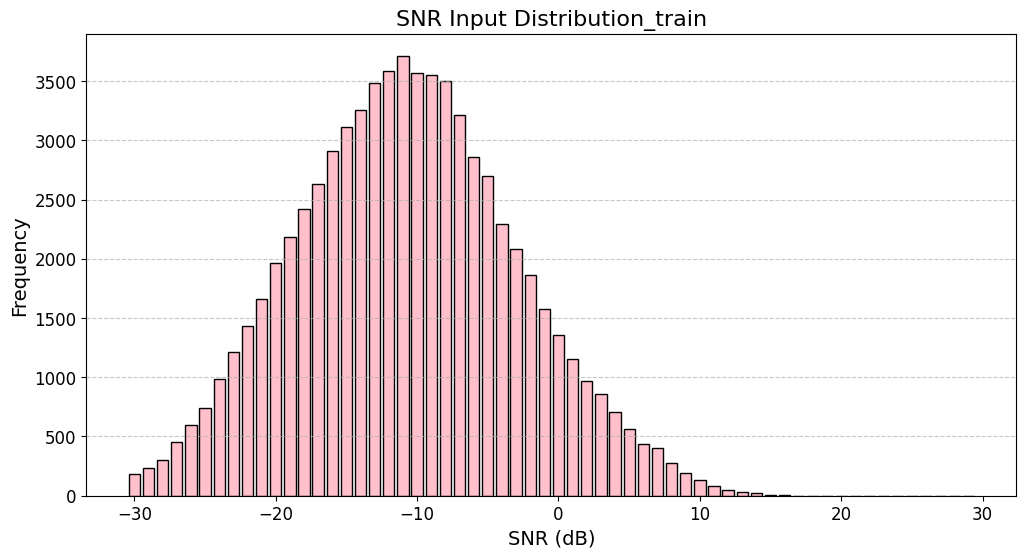

Saved bar plot to /content/drive/MyDrive/snr_train_distribution_plot.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Excel file
excel_file_path = '/content/drive/MyDrive/model.xlsx'
df = pd.read_excel(excel_file_path)

# Define the bin edges
bins = np.arange(-30.5, 30.5, 1)  # Bins from -30 to 30 with step size 1

# Create a new column for binned SNR values
df['SNR Binned'] = pd.cut(df['SNR Input'], bins=bins, labels=np.arange(-30, 30))

# Count the frequencies for each bin
snr_counts = df['SNR Binned'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(snr_counts.index.astype(int), snr_counts.values, color='pink', edgecolor='black')
plt.title('SNR Input Distribution_train', fontsize=16)
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plot_file_path = '/content/drive/MyDrive/snr_train_distribution_plot.png'
plt.savefig(plot_file_path, dpi=1000)
plt.show()

print(f'Saved bar plot to {plot_file_path}')


# hi

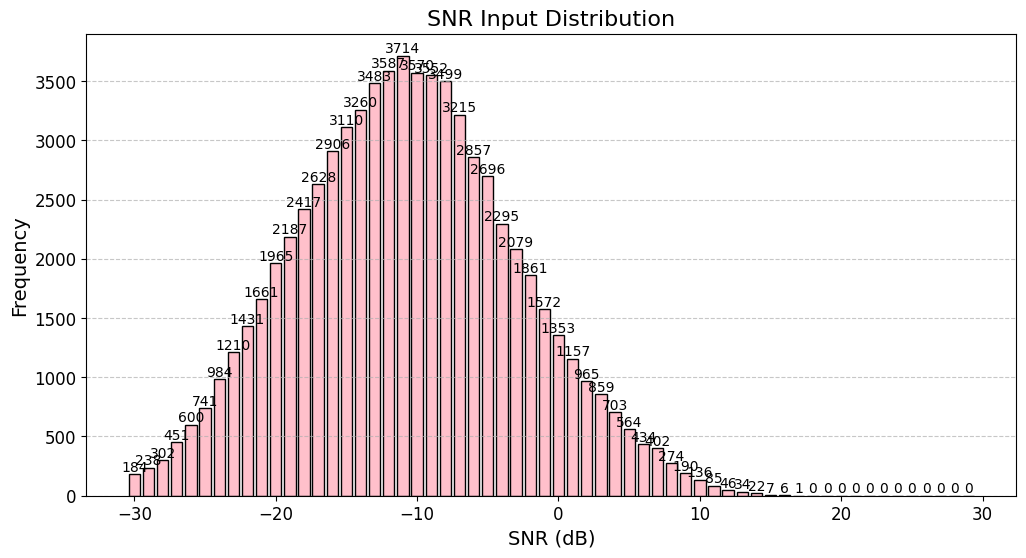

Saved bar plot to /content/drive/MyDrive/snr_train_distribution_plot_texted.png


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Excel file
excel_file_path = '/content/drive/MyDrive/model.xlsx'
df = pd.read_excel(excel_file_path)

# Define the bin edges
bins = np.arange(-30.5, 30.5, 1)  # Bins from -30 to 30 with step size 1

# Create a new column for binned SNR values
df['SNR Binned'] = pd.cut(df['SNR Input'], bins=bins, labels=np.arange(-30, 30))

# Count the frequencies for each bin
snr_counts = df['SNR Binned'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(snr_counts.index.astype(int), snr_counts.values, color='pink', edgecolor='black')
plt.title('SNR Input Distribution', fontsize=16)
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Save and show the plot
plot_file_path = '/content/drive/MyDrive/snr_train_distribution_plot_texted.png'
plt.savefig(plot_file_path, dpi=1000)
plt.show()

print(f'Saved bar plot to {plot_file_path}')


In [22]:
s_input = []
s_output = []
s_imp = []

for i in range(len(X_test)):
    snr_input = calculate_snr(y_test[i],X_test[i])
    s_input.append(snr_input)



# Create a DataFrame to hold the results
df = pd.DataFrame({
    'SNR Input': s_input,

})

excel_file_path =  f'/content/drive/MyDrive/model_test.xlsx'
df.to_excel(excel_file_path, index=False)
print(f'Saved SNR results to {excel_file_path}')

Saved SNR results to /content/drive/MyDrive/model_test.xlsx


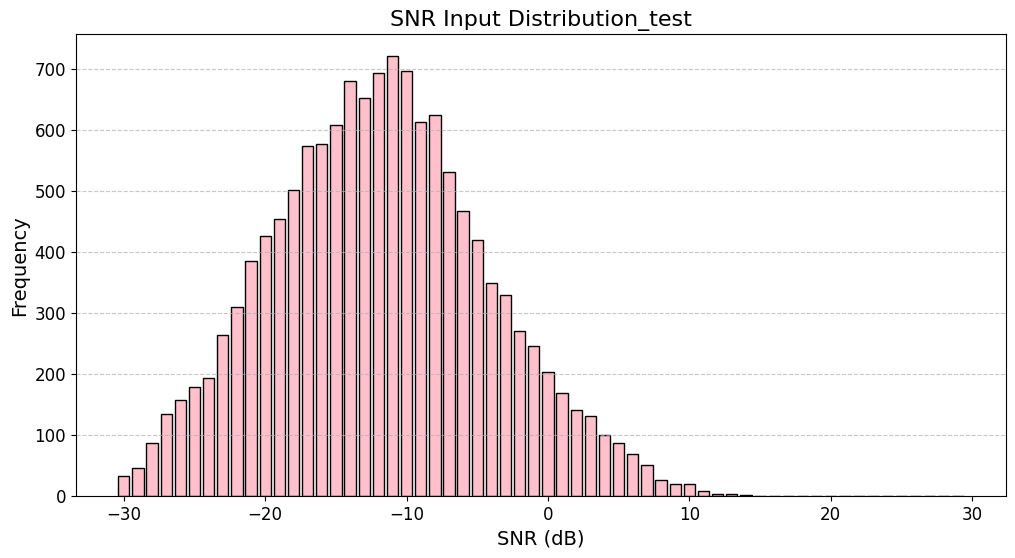

Saved bar plot to /content/drive/MyDrive/snr_test_distribution_plot.png


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Excel file
excel_file_path = '/content/drive/MyDrive/model_test.xlsx'
df = pd.read_excel(excel_file_path)

# Define the bin edges
bins = np.arange(-30.5, 30.5, 1)  # Bins from -30 to 30 with step size 1

# Create a new column for binned SNR values
df['SNR Binned'] = pd.cut(df['SNR Input'], bins=bins, labels=np.arange(-30, 30))

# Count the frequencies for each bin
snr_counts = df['SNR Binned'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(snr_counts.index.astype(int), snr_counts.values, color='pink', edgecolor='black')
plt.title('SNR Input Distribution_test', fontsize=16)
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plot_file_path = '/content/drive/MyDrive/snr_test_distribution_plot.png'
plt.savefig(plot_file_path, dpi=1000)
plt.show()

print(f'Saved bar plot to {plot_file_path}')


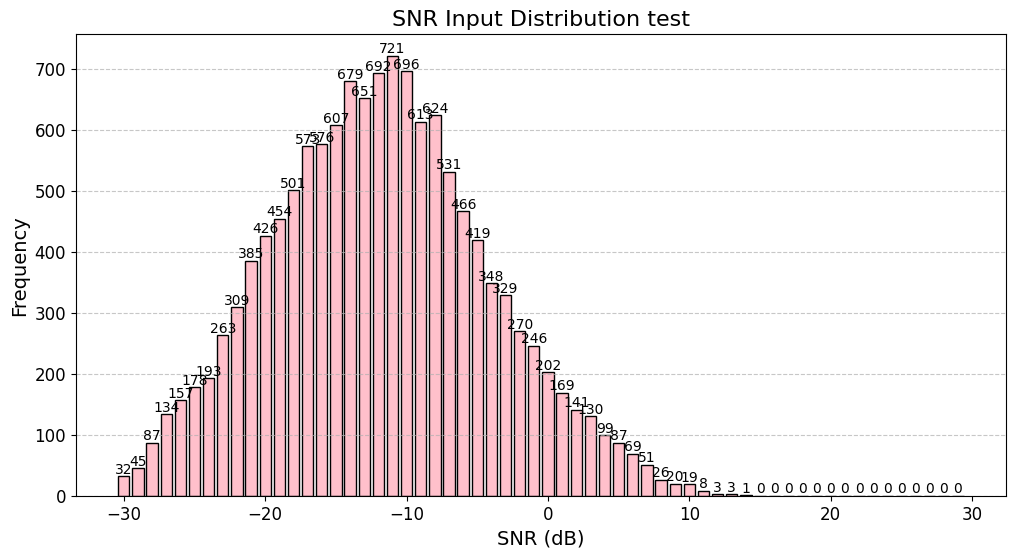

Saved bar plot to /content/drive/MyDrive/snr_test_distribution_plot_texted.png


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Excel file
excel_file_path = '/content/drive/MyDrive/model_test.xlsx'
df = pd.read_excel(excel_file_path)

# Define the bin edges
bins = np.arange(-30.5, 30.5, 1)  # Bins from -30 to 30 with step size 1

# Create a new column for binned SNR values
df['SNR Binned'] = pd.cut(df['SNR Input'], bins=bins, labels=np.arange(-30, 30))

# Count the frequencies for each bin
snr_counts = df['SNR Binned'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(snr_counts.index.astype(int), snr_counts.values, color='pink', edgecolor='black')
plt.title('SNR Input Distribution test', fontsize=16)
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Save and show the plot
plot_file_path = '/content/drive/MyDrive/snr_test_distribution_plot_texted.png'
plt.savefig(plot_file_path, dpi=1000)
plt.show()

print(f'Saved bar plot to {plot_file_path}')
